# Navigation - Udacity Project 1

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).



In [2]:
from unityagents import UnityEnvironment
import torch
import pandas as pd
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
#!pwd
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64",no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- 0 - walk forward 
- 1 - walk backward
- 2 - turn left
- 3 - turn right

The state space has 37 dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of +1 is provided for collecting a yellow banana, and a reward of -1 is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Train the Agent 
In the next code cell, we will use Python API to control the agent and receive feedback from the environment. 

We'll intialize the agent with various versions of DQN algorithms by parameters. 

The parameters are below:

---
**use_deul_dqn**: True/False  
**use_double_dqn**: True/False

    agent = Agent(state_size, action_size, seed=0, 
            fc1_nodes=128, fc2_nodes=64, 
            use_double_dqn=True,  use_duel_dqn=True)



In [6]:
from dqn_agent import Agent
import importlib

importlib.import_module("dqn_agent").Agent

condition=[]
score_history= []
mean_score_history=[]
first_episode_achieved=[]

In [16]:
#Define train 
def train_agent(agent, n_episodes=500, max_t=500, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    mean_scores=[]
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    last_mean_max=13
    first_print= True
    episode_achieved=0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        while True:
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            score += reward                                # update the score
            agent.step(state, action, reward, next_state, done) # learning step
            state = next_state
            if done:
               break
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score      
        mean_scores.append(np.mean(scores_window)) # Save Mean scores for plotting purpose
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode %4d\tAverage Score: %.2f' % (i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode %4d\tAverage Score: %.2f' %(i_episode, np.mean(scores_window)))
            
        if np.mean(scores_window)>=13:
            if first_print:
                print('\nGoal(+13) in %4d episodes!\tAverage Score: %.2f' % (i_episode-100, np.mean(scores_window)))
                episode_achieved=i_episode-100
                first_print = False
            if np.mean(scores_window)>last_mean_max:
                last_mean_max=np.mean(scores_window)
                torch.save(agent.qnetwork_local.state_dict(), 'model.pth')
            
    return scores, mean_scores, episode_achieved



In [17]:
def plot_scores(scores, score_label, mean_scores):
    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores, label=score_label)
    plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend(loc='upper left')
    plt.show()    

In [18]:
def run_agent(p_use_duel_dqn, p_use_double_dqn, p_model_layout):
    agent = Agent(state_size, action_size, seed=0, use_duel_dqn=p_use_duel_dqn, use_double_dqn=p_use_double_dqn, model_layout=p_model_layout)
    scores, mean_scores,episode_achieved = train_agent(agent)
    condition.append([0, 0,p_model_layout])
    score_history.append(max(scores))
    mean_score_history.append(max(mean_scores))
    first_episode_achieved.append(episode_achieved)

    plot_scores(scores, p_model_layout, mean_scores)



#### Train Agent with DQN Agent with Replay Buffer

<img src='images/dqn_summary.JPG' height=800, width=500, align=left>


In [ ]:

run_agent(p_use_duel_dqn=False, p_use_double_dqn=False,p_model_layout="64_2_layers")


Episode   38	Average Score: 0.003

#### Train agent with double dqn algorithm
DQN has the issue of overestimation of Q-Values, we can try to use double DQN alogorithms. 


<img src='images/why-double-DQN.JPG' height=500, width=300 align=left>
<img src='images/double_dqn.JPG' height=500, width=300>


[Double Q-Learning](https://arxiv.org/pdf/1509.06461.pdf) uses local Q network to pick next argmax(Q(s,a)) action and uses target network to compute target Q values. please see code below under the "dpn_agent.py"

<img src='images/double_dqn_equation.JPG' height=600, width=400>


    if self.use_double_dqn:
            localQ_max_action = torch.argmax(self.qnetwork_local(next_states).detach(),1)
            Q_targets_next = self.qnetwork_target(next_states).detach().gather(1,localQ_max_action.unsqueeze(1))
        else:
            Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
            

Episode 100	Average Score: 0.61
Episode 200	Average Score: 4.42
Episode 300	Average Score: 7.75
Episode 400	Average Score: 9.972
Episode 486	Average Score: 13.01
Environment solved in 386 episodes!	Average Score: 13.01
Episode 500	Average Score: 13.42
Episode 600	Average Score: 15.41
Episode 700	Average Score: 15.12
Episode 800	Average Score: 15.95
Episode 900	Average Score: 16.59
Episode 1000	Average Score: 16.38
Episode 1100	Average Score: 15.73
Episode 1200	Average Score: 16.59
Episode 1300	Average Score: 16.36
Episode 1400	Average Score: 16.76
Episode 1500	Average Score: 16.00
Episode 1600	Average Score: 16.07
Episode 1700	Average Score: 16.08
Episode 1800	Average Score: 16.68


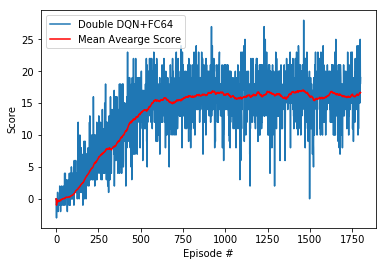

In [ ]:
#Train Agent with Double DQN Agent 
agent = Agent(state_size, action_size, seed=0,use_duel_dqn=False, use_double_dqn=True, use_basic=True)

scores, mean_scores,episode_achieved = train_agent(agent)
condition.append([0, 1,'FC64'])
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_achieved)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Double DQN+FC64')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()



#### Train Agent with Deuling and Double DQN algorithm. 

In order to determine which states are (or are not) valuable, we have to estimate the corresponding action values for each action. However, by replacing the traditional Deep Q-Network (DQN) architecture with a [dueling architecture](https://arxiv.org/abs/1511.06581), we can assess the value of each state, without having to learn the effect of each action.

<img src='images/duel_dqn_network_comp.JPG' height=500, width=400, align=left>


At the end of the DQN network, V(S) and Q(S,A) are computed seperately and merged at the final layer.

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        if self.use_duel_dqn:
            return self.fc3(x)+self.v(x)         
        else:
            return self.fc3(x)
          
         

Episode 100	Average Score: 0.18
Episode 200	Average Score: 3.42
Episode 300	Average Score: 7.08
Episode 400	Average Score: 10.16
Episode 472	Average Score: 13.03
Environment solved in 372 episodes!	Average Score: 13.03
Episode 500	Average Score: 13.79
Episode 600	Average Score: 15.12
Episode 700	Average Score: 15.17
Episode 800	Average Score: 16.21
Episode 900	Average Score: 16.76
Episode 1000	Average Score: 16.63
Episode 1100	Average Score: 16.14
Episode 1200	Average Score: 16.45
Episode 1300	Average Score: 16.56
Episode 1400	Average Score: 15.96
Episode 1500	Average Score: 16.26
Episode 1600	Average Score: 16.24
Episode 1700	Average Score: 16.67
Episode 1800	Average Score: 16.73


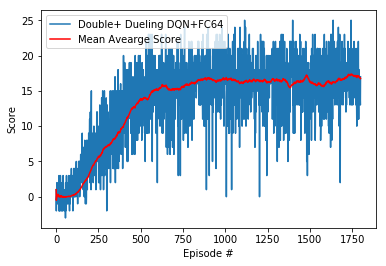

In [ ]:
#Train Agent with Double+Duel DQN Agent 
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

agent = Agent(state_size, action_size, seed=0,use_duel_dqn=True,use_double_dqn=True,use_basic=True)
scores, mean_scores,episode_achieved = train_agent(agent)

condition.append([1, 1,'FC64'])
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_achieved)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Double+ Dueling DQN+FC64')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')



#### Experiment with Different Q nueral network architecture

The default deep neural netowrk is designed with 2 hidden layers of 64,32 nodes. You can change 3 hidden layers of 128,64,32 nodes by setting "use_basic" option to False


In [ ]:
#Train Agent with DQN agent
agent = Agent(state_size, action_size, seed=0, use_duel_dqn=False, use_double_dqn=False,use_basic=False)
scores, mean_scores,episode_achieved = train_agent(agent)
condition.append([0, 0,'FC128'])
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_achieved)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DQN Only+FC128')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

In [ ]:
agent = Agent(state_size, action_size, seed=0,use_duel_dqn=False, use_double_dqn=True, use_basic=False)

scores, mean_scores,episode_achieved = train_agent(agent)
condition.append([0, 1,'FC128'])
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_achieved)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Double DQN+FC128')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

In [ ]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

agent = Agent(state_size, action_size, seed=0,use_duel_dqn=True,use_double_dqn=True,use_basic=False)
scores, mean_scores,episode_achieved = train_agent(agent)

condition.append([1, 1,'FC128'])
score_history.append(max(scores))
mean_score_history.append(max(mean_scores))
first_episode_achieved.append(episode_achieved)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Double+ Dueling DQN+FC128')
plt.plot(np.arange(len(scores)), mean_scores, c='r', label='Mean Avearge Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')


#### Compare results with different algorithms. 

Below codes print out results from previous experiments. Each clolums represents followings.
- [duel,double,netowrk] : Algorithms(dueling DQN, Double DQN) used. 1 Represent that algorithm is used while 0 represent it is not used. [0 0] reprsent just Vanilla DQN is used. 
- MaxScore: Max. Score achieved
- MaxMeanScore: Max. Mean Score Achieved
- F_Episode: First Episode that the goal(+13) was achieved:

In [ ]:
df = pd.DataFrame(data=[condition, score_history, mean_score_history, first_episode_achieved])
df=df.T

df.columns = ['[duel,double,network]', 'MaxScore','MaxMeanScore','F_Episode']
print(df)


In [ ]:
env.close()